<a href="https://colab.research.google.com/github/Ang-Li-code/MAT422/blob/main/HW_3_5%2C_3_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-means Clustering

K-means clustering is a method to partition a set of $n$ observations into $k$ clusters, where $k < n$.

To achieve this, the following algorithm is used:
1. Define $k$
2. Select $k$ random points to serve as the center of the clusters (i.e. cluster center)
3. Assign each point in the data set to the cluster center closest to them, that will be the cluster they belong to
4. For each cluster, calculate the center / mean of all points in the cluster. That point is now the new center point.
5. Repeat steps 3 and 4, until each point is consistently assigned to the same cluster.

The following code will demonstrate how to utilize k-means clustering on a given data set, as well as how to choose a good "$k$" for the algorithm

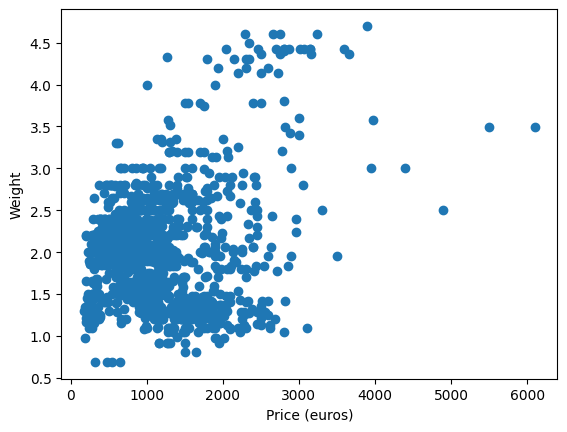

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# loads the dataset
computer_data = pd.read_csv("laptop_prices.xls")
computer_data.head()

# plots the dataset
plt.scatter(computer_data['Price_euros'],computer_data['Weight'])
plt.xlabel('Price (euros)')
plt.ylabel('Weight')
plt.show()

<Axes: xlabel='Price_euros', ylabel='Weight'>

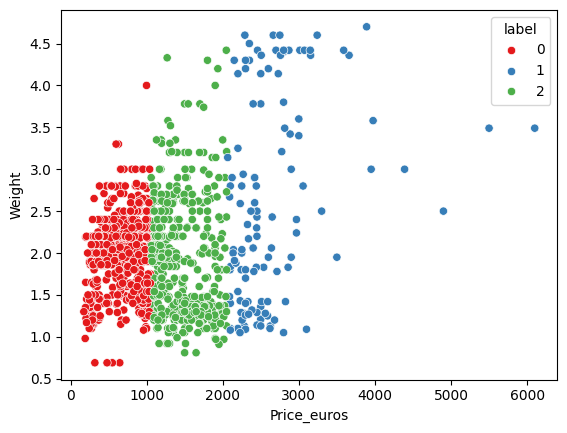

In [ ]:
from sklearn.cluster import KMeans
import seaborn as sns

cluster = KMeans(n_clusters=3)
cluster.fit(computer_data[['Price_euros','Weight']])

labels = cluster.labels_
computer_data['label'] = labels
sns.scatterplot(x = computer_data['Price_euros'], y = computer_data['Weight'], hue=computer_data['label'], palette='Set1')

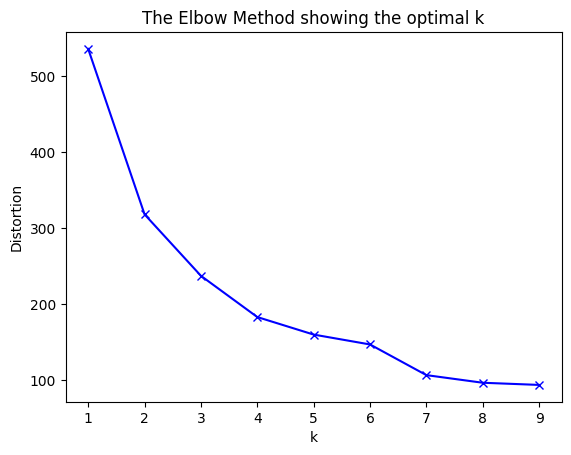

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

distortions = []
K = range(1,10)

for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(computer_data[['Price_euros','Weight']])
    kmeanModel.fit(computer_data[['Price_euros','Weight']])
    distortions.append(sum(np.min(cdist(computer_data[['Price_euros','Weight']], kmeanModel.cluster_centers_, 'euclidean'), axis = 1)) / computer_data.shape[0])

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

# Support Vector Machine (SVM)

Support vector machines are supervised machine learning models that analyze data for classification and regression.

Given a set of $n$ dimensional data points $x$ paired with a value $y$ that is either 1 or -1, the aim is to create a hyperplane that divides the group of points $x_i$ that is paired with a $y = 1$ from the group of points paired with a $y = -1$

The following code will demonstrate how to use a support vector machine to analyze a data set involving lung cancer and check how accurately it is able to predict whether a person has lung cancer or not.

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# loads the dataset
cancer_dataset = pd.read_csv("survey lung cancer.csv")
cancer_dataset.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [64]:
from sklearn import svm

# Cleaning the dataset into data and targer
cancer_dataset['LUNG_CANCER'] = cancer_dataset['LUNG_CANCER'].map({'YES': 1, 'NO': 0})
cancer_dataset['GENDER'] = cancer_dataset['GENDER'].map({'M': 1, 'F': 0})
cancer_dataset = cancer_dataset.dropna(axis=1, how = 'all')

cancer_dataset.head()

cancer_data = cancer_dataset.drop('LUNG_CANCER', axis=1)
cancer_target = cancer_dataset['LUNG_CANCER']

In [68]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Splits the dataset into a set for training and a set for
X_train, X_test, y_train, y_test = train_test_split(cancer_data, cancer_target, test_size=0.3) # 70% training and 30% test

# Create a svm Classifier
classifier = svm.SVC(kernel='linear') # Linear Kernel

# Train and test the classifier
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# Display the accuracy of the model
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9354838709677419
